In [144]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [166]:
# from https://github.com/pvigier/perlin-numpy/tree/master

def interpolant(t):
    return t*t*t*(t*(t*6 - 15) + 10)

def generate_perlin_noise_2d(
        shape, res, tileable=(False, False), interpolant=interpolant
):
    """Generate a 2D numpy array of perlin noise.

    Args:
        shape: The shape of the generated array (tuple of two ints).
            This must be a multple of res.
        res: The number of periods of noise to generate along each
            axis (tuple of two ints). Note shape must be a multiple of
            res.
        tileable: If the noise should be tileable along each axis
            (tuple of two bools). Defaults to (False, False).
        interpolant: The interpolation function, defaults to
            t*t*t*(t*(t*6 - 15) + 10).

    Returns:
        A numpy array of shape shape with the generated noise.

    Raises:
        ValueError: If shape is not a multiple of res.
    """
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0], 0:res[1]:delta[1]]\
             .transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    if tileable[0]:
        gradients[-1,:] = gradients[0,:]
    if tileable[1]:
        gradients[:,-1] = gradients[:,0]
    gradients = gradients.repeat(d[0], 0).repeat(d[1], 1)
    g00 = gradients[    :-d[0],    :-d[1]]
    g10 = gradients[d[0]:     ,    :-d[1]]
    g01 = gradients[    :-d[0],d[1]:     ]
    g11 = gradients[d[0]:     ,d[1]:     ]
    # Ramps
    n00 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]  )) * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]  )) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = interpolant(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)

def generate_perlin_noise_3d(
        shape, res, tileable=(False, False, False),
        interpolant=interpolant
):
    """Generate a 3D numpy array of perlin noise.

    Args:
        shape: The shape of the generated array (tuple of three ints).
            This must be a multiple of res.
        res: The number of periods of noise to generate along each
            axis (tuple of three ints). Note shape must be a multiple
            of res.
        tileable: If the noise should be tileable along each axis
            (tuple of three bools). Defaults to (False, False, False).
        interpolant: The interpolation function, defaults to
            t*t*t*(t*(t*6 - 15) + 10).

    Returns:
        A numpy array of shape shape with the generated noise.

    Raises:
        ValueError: If shape is not a multiple of res.
    """
    delta = (res[0] / shape[0], res[1] / shape[1], res[2] / shape[2])
    d = (shape[0] // res[0], shape[1] // res[1], shape[2] // res[2])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1],0:res[2]:delta[2]]
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1],0:res[2]:delta[2]]
    grid = grid.transpose(1, 2, 3, 0) % 1
    # Gradients
    theta = 2*np.pi*np.random.rand(res[0] + 1, res[1] + 1, res[2] + 1)
    phi = 2*np.pi*np.random.rand(res[0] + 1, res[1] + 1, res[2] + 1)
    gradients = np.stack(
        (np.sin(phi)*np.cos(theta), np.sin(phi)*np.sin(theta), np.cos(phi)),
        axis=3
    )
    if tileable[0]:
        gradients[-1,:,:] = gradients[0,:,:]
    if tileable[1]:
        gradients[:,-1,:] = gradients[:,0,:]
    if tileable[2]:
        gradients[:,:,-1] = gradients[:,:,0]
    gradients = gradients.repeat(d[0], 0).repeat(d[1], 1).repeat(d[2], 2)
    g000 = gradients[    :-d[0],    :-d[1],    :-d[2]]
    g100 = gradients[d[0]:     ,    :-d[1],    :-d[2]]
    g010 = gradients[    :-d[0],d[1]:     ,    :-d[2]]
    g110 = gradients[d[0]:     ,d[1]:     ,    :-d[2]]
    g001 = gradients[    :-d[0],    :-d[1],d[2]:     ]
    g101 = gradients[d[0]:     ,    :-d[1],d[2]:     ]
    g011 = gradients[    :-d[0],d[1]:     ,d[2]:     ]
    g111 = gradients[d[0]:     ,d[1]:     ,d[2]:     ]
    # Ramps
    n000 = np.sum(np.stack((grid[:,:,:,0]  , grid[:,:,:,1]  , grid[:,:,:,2]  ), axis=3) * g000, 3)
    n100 = np.sum(np.stack((grid[:,:,:,0]-1, grid[:,:,:,1]  , grid[:,:,:,2]  ), axis=3) * g100, 3)
    n010 = np.sum(np.stack((grid[:,:,:,0]  , grid[:,:,:,1]-1, grid[:,:,:,2]  ), axis=3) * g010, 3)
    n110 = np.sum(np.stack((grid[:,:,:,0]-1, grid[:,:,:,1]-1, grid[:,:,:,2]  ), axis=3) * g110, 3)
    n001 = np.sum(np.stack((grid[:,:,:,0]  , grid[:,:,:,1]  , grid[:,:,:,2]-1), axis=3) * g001, 3)
    n101 = np.sum(np.stack((grid[:,:,:,0]-1, grid[:,:,:,1]  , grid[:,:,:,2]-1), axis=3) * g101, 3)
    n011 = np.sum(np.stack((grid[:,:,:,0]  , grid[:,:,:,1]-1, grid[:,:,:,2]-1), axis=3) * g011, 3)
    n111 = np.sum(np.stack((grid[:,:,:,0]-1, grid[:,:,:,1]-1, grid[:,:,:,2]-1), axis=3) * g111, 3)
    # Interpolation
    t = interpolant(grid)
    n00 = n000*(1-t[:,:,:,0]) + t[:,:,:,0]*n100
    n10 = n010*(1-t[:,:,:,0]) + t[:,:,:,0]*n110
    n01 = n001*(1-t[:,:,:,0]) + t[:,:,:,0]*n101
    n11 = n011*(1-t[:,:,:,0]) + t[:,:,:,0]*n111
    n0 = (1-t[:,:,:,1])*n00 + t[:,:,:,1]*n10
    n1 = (1-t[:,:,:,1])*n01 + t[:,:,:,1]*n11
    return ((1-t[:,:,:,2])*n0 + t[:,:,:,2]*n1)

def generate_fractal_noise_2d(
        shape, res, octaves=1, persistence=0.5,
        lacunarity=2, tileable=(False, False),
        interpolant=interpolant
):
    """Generate a 2D numpy array of fractal noise.

    Args:
        shape: The shape of the generated array (tuple of two ints).
            This must be a multiple of lacunarity**(octaves-1)*res.
        res: The number of periods of noise to generate along each
            axis (tuple of two ints). Note shape must be a multiple of
            (lacunarity**(octaves-1)*res).
        octaves: The number of octaves in the noise. Defaults to 1.
        persistence: The scaling factor between two octaves.
        lacunarity: The frequency factor between two octaves.
        tileable: If the noise should be tileable along each axis
            (tuple of two bools). Defaults to (False, False).
        interpolant: The, interpolation function, defaults to
            t*t*t*(t*(t*6 - 15) + 10).

    Returns:
        A numpy array of fractal noise and of shape shape generated by
        combining several octaves of perlin noise.

    Raises:
        ValueError: If shape is not a multiple of
            (lacunarity**(octaves-1)*res).
    """
    noise = np.zeros(shape)
    frequency = 1
    amplitude = 1
    for _ in range(octaves):
        noise += amplitude * generate_perlin_noise_2d(
            shape, (frequency*res[0], frequency*res[1]), tileable, interpolant
        )
        frequency *= lacunarity
        amplitude *= persistence
    return noise


In [ ]:
noiseShape = 600
xGridpoints = 60
yGridpoints = 6
nLEDs = 60

myNoiseBlue = (generate_perlin_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints)) + 3) / 4
myNoiseRed = (generate_perlin_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints)) + 1) / 8
myNoiseGreen = (generate_perlin_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints)) + 1) / 2
myRGBNoise = np.dstack((myNoiseRed, myNoiseGreen, myNoiseBlue))

(600, 600, 3)

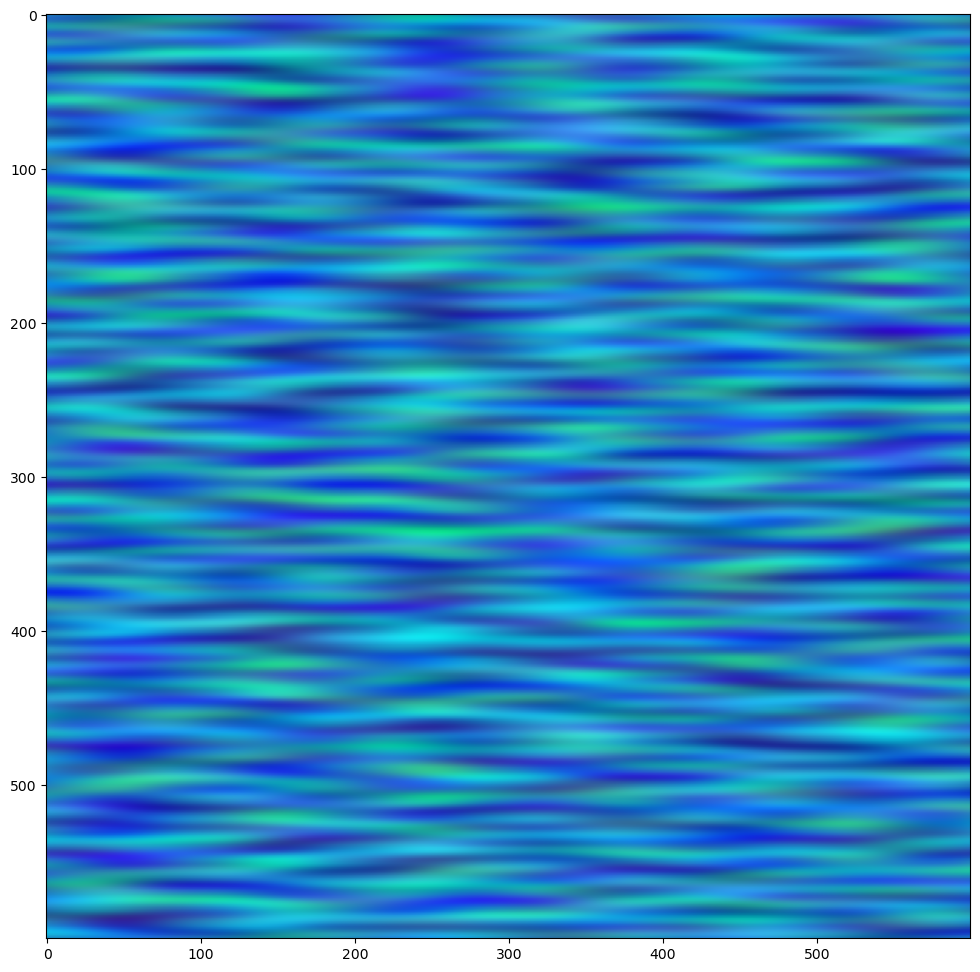

In [147]:

plt.figure(figsize=(12,12))
plt.imshow(myRGBNoise)

plt.show()

In [ ]:
frames = []
height = 200
width = 1000

for i in range(myRGBNoise.shape[0]):
    noiseStrip = myRGBNoise[i, ::int(noiseShape/nLEDs), :]
    noiseStrip = noiseStrip[np.newaxis,:,:]
    gifFrame = noiseStrip.repeat(height,0).repeat(int(width//noiseStrip.shape[1]), 1)
    gifFrame = (gifFrame * 255).astype(np.uint8)

    frames.append(gifFrame)

print(int(width//noiseStrip.shape[1]))

imageio.mimsave("./output_water.gif", frames, fps=10)

16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.4377596929779766..1.0913281809044617].


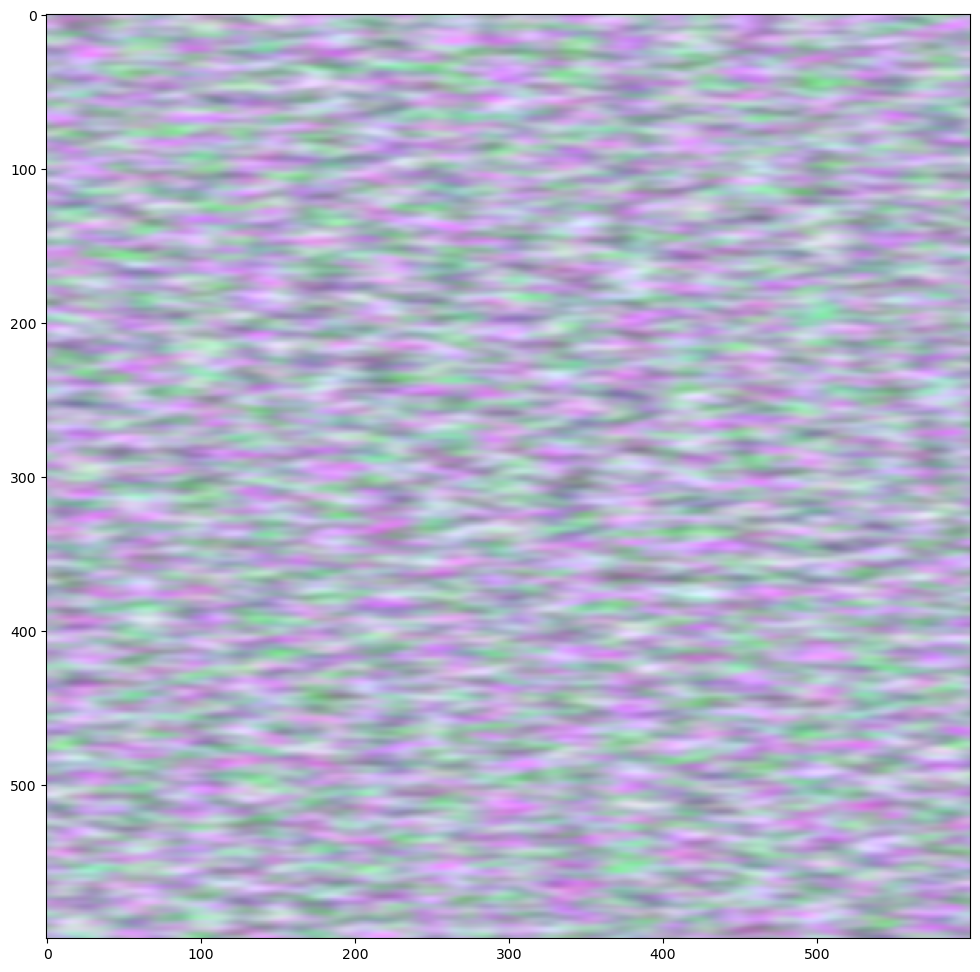

In [ ]:
noiseShape = 600
xGridpoints = 60
yGridpoints = 15
nLEDs = 60

myNoiseBlue = (generate_fractal_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints), octaves=2) + 1.2) / 12
myNoiseRed = (generate_fractal_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints), octaves=2) + 3) / 4.3
myNoiseYellow = (generate_fractal_noise_2d((noiseShape,noiseShape), (xGridpoints,yGridpoints), octaves=2) + 3) / 4.3

myRBYNoise = np.dstack((myNoiseRed, myNoiseBlue, myNoiseYellow))

RBYtoRGB = np.array([
    [1, 0, 0],   # Red basis vector
    [0, 0, 1],   # Blue basis vector
    [1, 1, 0]    # Yellow basis vector
])

myRGBNoise = myRBYNoise @ RBYtoRGB.T

plt.figure(figsize=(12,12))
plt.imshow(myRGBNoise)

plt.show()

In [180]:
frames = []
height = 200
width = 1000

for i in range(myRGBNoise.shape[0]):
    noiseStrip = myRGBNoise[i, ::int(noiseShape/nLEDs), :]
    noiseStrip = noiseStrip[np.newaxis,:,:]
    gifFrame = noiseStrip.repeat(height,0).repeat(int(width//noiseStrip.shape[1]), 1)
    gifFrame = (gifFrame * 255).astype(np.uint8)

    frames.append(gifFrame)

print(int(width//noiseStrip.shape[1]))

imageio.mimsave("./output_fire.gif", frames, fps=30)

16


In [ ]:
myArray = np.array([127.5,117.279,101.282,96.2457,108.612,127.5,115.47,124.434,141.689,145.164,
                    -4462.6,-1747.97,-485.687,-8.38554,108.264,105.841,96.5972,110.013,132.499,140.239,
                    -3353.78,-1297.21,-357.991,-7.65166,79.8457,83.3513,81.9222,94.3513,110.831,116.754,-1170.33,
                    -379.481,-60.4267,44.6276,72.3756,82.1955,90.6531,96.7307,97.7766,96.1787,592.449,375.683,
                    201.324,110.859,90.1874,103.852,118.985,118.971,106.829,98.3082])

960